In [17]:
import pandas as pd
import numpy as np

# Guardando os arquivos em variáveis
try:
    df_2017 = pd.read_csv(r'C:\Users\vitor\Downloads\matricula_df_2017v2.csv', sep=',', encoding='latin-1', low_memory=False)
    df_2018 = pd.read_csv(r'C:\Users\vitor\Downloads\matricula_df_2018.csv', sep=',', encoding='latin-1', low_memory=False)
    df_2019 = pd.read_csv(r'C:\Users\vitor\Downloads\matricula_df_2019.csv', sep=',', encoding='latin-1', low_memory=False)
    print("Arquivos de dados de 2017, 2018 e 2019 foram carregados com sucesso.")
    
except FileNotFoundError as e:
    print(f"ERRO: Arquivo não encontrado - {e}. Verifique se o nome e o local dos arquivos CSV estão corretos.")
    exit()

Arquivos de dados de 2017, 2018 e 2019 foram carregados com sucesso.


In [18]:
# Descobrindo o nome de todas as colunas presentes
df_2017.head()

,ano,sigla_uf,id_municipio,id_distrito,id_escola,rede,id_turma,id_aluno,id_pessoa_fisica,id_matricula,...,especial_exclusiva,regular,eja,profissionalizante,id_curso_educ_profissional,mediacao_didatico_pedagogica,unificada,tipo_atendimento_turma,tipo_local_turma,tipo_turma
0,2017,DF,5300108,530010805,53002784,2,8781295,NaN,110702688109,169193720,...,0.0,1.0,0.0,0.0,NaN,1,0.0,NaN,NaN,0
1,2017,DF,5300108,530010805,53002784,2,8781295,NaN,116594562311,104420997,...,0.0,1.0,0.0,0.0,NaN,1,0.0,NaN,NaN,0
2,2017,DF,5300108,530010805,53002784,2,8783310,NaN,116719626808,51663630,...,0.0,1.0,0.0,0.0,NaN,1,0.0,NaN,NaN,0
3,2017,DF,5300108,530010805,53006984,2,8783272,NaN,119033939494,221221512,...,0.0,1.0,0.0,0.0,NaN,1,0.0,NaN,NaN,0
4,2017,DF,5300108,530010805,53002784,2,8784333,NaN,120471472394,169607620,...,0.0,1.0,0.0,0.0,NaN,1,0.0,NaN,NaN,0


In [31]:
def diagnosticar(df, ano):
    print(f"Diagnóstico do DATAFRAME: {ano}.")

    colunas_criticas = ['id_aluno', 'id_pessoa_fisica', 'id_matricula', 'etapa_ensino']
    problemas = 0 

    for coluna in colunas_criticas:
        if coluna not in df.columns:
            print(F"ERRO: a coluna {coluna} NÃO EXISTE.")
            problemas += 1
            continue

        percentual_nao_nulo = df[coluna].notna().sum() / len(df) * 100

        print(f"Coluna {coluna}: {percentual_nao_nulo:.2f}% de dados preenchidos.")

        if percentual_nao_nulo < 80:
            print(f"ALERTA: a coluna {coluna} possui muitos dados faltantes.")
            problemas += 1

    if problemas == 0:
        print(f"0 PROBLEMAS no {ano}, tudo certo!")
    else:
        print(f"MUITOS PROBLEMAS no ano {ano}.")
    print()

In [32]:
diagnosticar(df_2017, 2017)
diagnosticar(df_2018, 2018)
diagnosticar(df_2019, 2019)

Diagnóstico do DATAFRAME: 2017.
Coluna id_aluno: 0.00% de dados preenchidos.
ALERTA: a coluna id_aluno possui muitos dados faltantes.
Coluna id_pessoa_fisica: 100.00% de dados preenchidos.
Coluna id_matricula: 100.00% de dados preenchidos.
Coluna etapa_ensino: 90.12% de dados preenchidos.
MUITOS PROBLEMAS no ano 2017.

Diagnóstico do DATAFRAME: 2018.
Coluna id_aluno: 100.00% de dados preenchidos.
Coluna id_pessoa_fisica: 0.00% de dados preenchidos.
ALERTA: a coluna id_pessoa_fisica possui muitos dados faltantes.
Coluna id_matricula: 100.00% de dados preenchidos.
Coluna etapa_ensino: 90.33% de dados preenchidos.
MUITOS PROBLEMAS no ano 2018.

Diagnóstico do DATAFRAME: 2019.
Coluna id_aluno: 0.00% de dados preenchidos.
ALERTA: a coluna id_aluno possui muitos dados faltantes.
Coluna id_pessoa_fisica: 100.00% de dados preenchidos.
Coluna id_matricula: 100.00% de dados preenchidos.
Coluna etapa_ensino: 90.12% de dados preenchidos.
MUITOS PROBLEMAS no ano 2019.



In [33]:
# Criação do DF principal
df = df_2017.copy()

# Quantidade de alunos por etapa de ensino:
df['etapa_ensino'].value_counts()

# Rede pública
redes_publicas = [1, 2, 3] # Federal, Estadual e Municipal
df_ensino_medio = df[df['rede'].isin(redes_publicas)]
print(f"Linhas após filtro de rede: {len(df_ensino_medio)}")

# Etapas do Ensino Medio
etapas_ensino_medio = [25.0, 26.0, 27.0]
df_ensino_medio = df_ensino_medio[df_ensino_medio['etapa_ensino'].isin(etapas_ensino_medio)]
print(f"Linhas após filtro de etapa: {len(df_ensino_medio)}")

# Engenharia de Feature
idade_esperada = {25.0: 15, # idade esperada para o 1°
                  26.0: 16, # idade esperada para o 2°
                  27.0: 17} # idade esperada para o 3°

df_ensino_medio['idade_esperada'] = df_ensino_medio['etapa_ensino'].map(idade_esperada)
df_ensino_medio['distorcao_idade_serie'] = df_ensino_medio['idade_referencia'] - df_ensino_medio['idade_esperada']

print("-- Contagem final--")
print(df_ensino_medio['distorcao_idade_serie'].value_counts().sort_index())

Linhas após filtro de rede: 538990
Linhas após filtro de etapa: 79960
-- Contagem final--
distorcao_idade_serie
-3         4
-2       132
-1      6977
 0     38971
 1     19665
 2     10153
 3      2625
 4       684
 5       249
 6       134
 7        85
 8        54
 9        25
 10       34
 11       24
 12       18
 13       15
 14        5
 15        6
 16        7
 17        6
 18        8
 19        7
 20       10
 21        7
 22        8
 23        5
 24        7
 25        5
 26        4
 27        6
 28        2
 30        5
 31        2
 34        2
 35        4
 36        1
 40        1
 45        1
 48        1
 55        1
Name: count, dtype: int64


In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

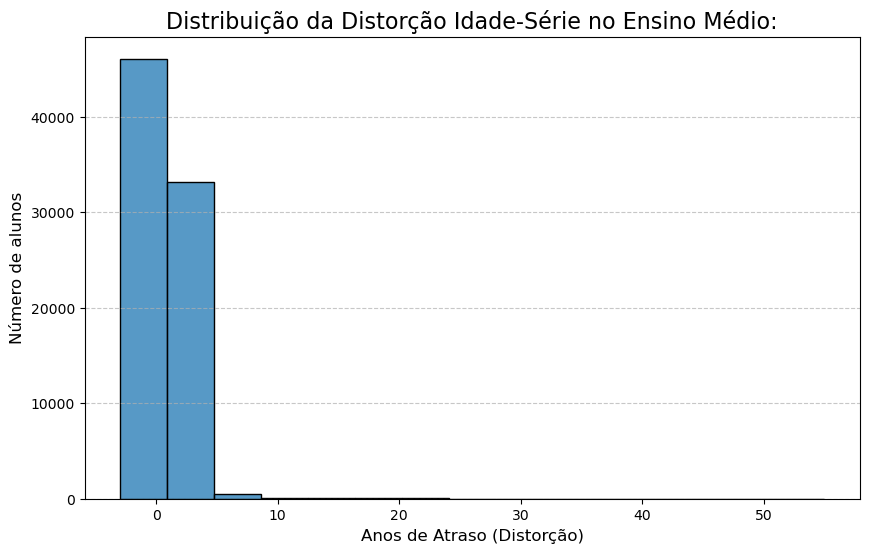

In [35]:
# Análise 1 - Qual é o tamanho do problema da distorção idade-série? Em Histograma

plt.figure(figsize=(10,6))
sns.histplot(df_ensino_medio['distorcao_idade_serie'], bins=15, kde=False)
plt.title('Distribuição da Distorção Idade-Série no Ensino Médio:', fontsize=16)
plt.xlabel('Anos de Atraso (Distorção)', fontsize=12)
plt.ylabel('Número de alunos', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig('histograma_distorcao.png')
plt.show()

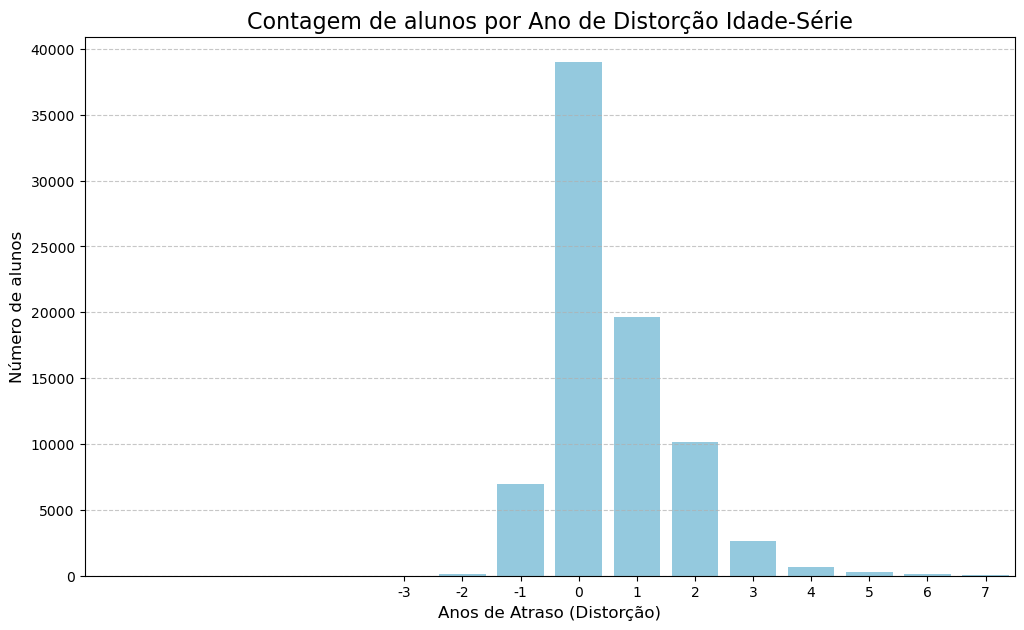

In [36]:
# Análise 2 - Qual é o tamanho do problema da distorção idade-série? Em Gráfico de Contagem

plt.figure(figsize=(12,7))
sns.countplot(x='distorcao_idade_serie', data=df_ensino_medio, color='skyblue')
plt.xlim(-5.5, 10.5)
plt.title('Contagem de alunos por Ano de Distorção Idade-Série', fontsize=16)
plt.xlabel('Anos de Atraso (Distorção)', fontsize=12)
plt.ylabel('Número de alunos', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig('countplot_distorcao.png')
plt.show()

In [37]:
print("Contagem exata de alunos por ano de distorção: ")
print(df_ensino_medio['distorcao_idade_serie'].value_counts().sort_index())

Contagem exata de alunos por ano de distorção: 
distorcao_idade_serie
-3         4
-2       132
-1      6977
 0     38971
 1     19665
 2     10153
 3      2625
 4       684
 5       249
 6       134
 7        85
 8        54
 9        25
 10       34
 11       24
 12       18
 13       15
 14        5
 15        6
 16        7
 17        6
 18        8
 19        7
 20       10
 21        7
 22        8
 23        5
 24        7
 25        5
 26        4
 27        6
 28        2
 30        5
 31        2
 34        2
 35        4
 36        1
 40        1
 45        1
 48        1
 55        1
Name: count, dtype: int64


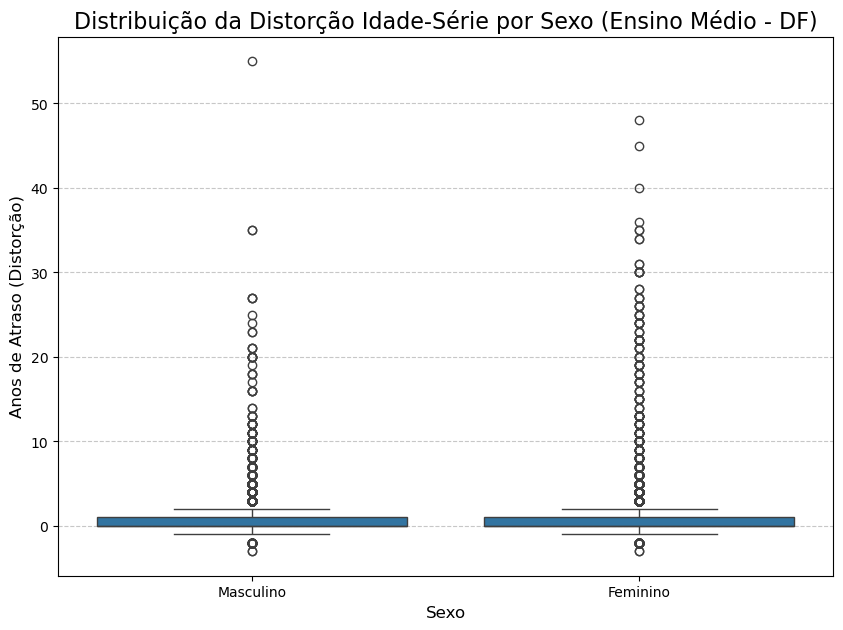

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# ==============================================================================
# Análise 2: Comparativo da Distorção Idade-Série por Sexo
# ==============================================================================
# Usando o dataframe 'df_filtrado', que é sua base de dados correta e validada.

# Mapeamento dos códigos da coluna 'sexo' para nomes descritivos
sexo_map = {1: 'Masculino', 2: 'Feminino'}
df_ensino_medio['sexo_desc'] = df_ensino_medio['sexo'].map(sexo_map)

# Criação do Gráfico Boxplot
plt.figure(figsize=(10, 7))
sns.boxplot(
    x='sexo_desc',
    y='distorcao_idade_serie',
    data=df_ensino_medio,
    order=['Masculino', 'Feminino'] # Garante a ordem das caixas no gráfico
)

plt.title('Distribuição da Distorção Idade-Série por Sexo (Ensino Médio - DF)', fontsize=16)
plt.xlabel('Sexo', fontsize=12)
plt.ylabel('Anos de Atraso (Distorção)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig('boxplot_distorcao_sexo.png')
plt.show()

In [39]:
print("Verificando a coluna da modalidade de ensino 'regular':")
print(df_ensino_medio['regular'].value_counts(dropna=False))

Verificando a coluna da modalidade de ensino 'regular':
regular
1.0    79960
Name: count, dtype: int64


In [40]:
df_regular = df_ensino_medio[df_ensino_medio['regular'] == 1].copy()

print(f"\nAnálise original tinha: {len(df_ensino_medio)} alunos (regular + EJA).")
print(f"Nova análise terá: {len(df_regular)} alunos (apenas regular).")


Análise original tinha: 79960 alunos (regular + EJA).
Nova análise terá: 79960 alunos (apenas regular).


In [41]:
# ==============================================================================
# ANÁLISE FORENSE: Investigando os Outliers
# ==============================================================================

# Vamos definir um limite de distorção que consideramos "impossível" para o ensino regular.
# 10 anos de atraso já é um valor extremamente alto, mas plausível. Acima disso é suspeito.
LIMITE_PLAUSIVEL = 10

# Cria um dataframe apenas com os outliers (alunos com distorção maior que o limite)
df_outliers = df_ensino_medio[df_ensino_medio['distorcao_idade_serie'] > LIMITE_PLAUSIVEL]

print(f"Foram encontrados {len(df_outliers)} registros com distorção maior que {LIMITE_PLAUSIVEL} anos.")

if not df_outliers.empty:
    print("\nAmostra de 5 registros com distorção impossível:")
    # Vamos olhar as colunas que geram o cálculo para entender o erro
    print(df_outliers[['ano_nascimento', 'idade_referencia', 'etapa_ensino', 'distorcao_idade_serie']])

Foram encontrados 168 registros com distorção maior que 10 anos.

Amostra de 5 registros com distorção impossível:
        ano_nascimento  idade_referencia  etapa_ensino  distorcao_idade_serie
11098             1990                27          26.0                     11
11362             1982                34          26.0                     18
12759             1990                26          25.0                     11
15515             1965                51          25.0                     36
19372             1983                34          25.0                     19
...                ...               ...           ...                    ...
641918            1986                30          27.0                     13
656166            1976                41          27.0                     24
673572            1987                29          26.0                     13
674502            1980                37          25.0                     22
681321            1989     

In [42]:
df_ensino_medio.columns

Index(['ano', 'sigla_uf', 'id_municipio', 'id_distrito', 'id_escola', 'rede',
       'id_turma', 'id_aluno', 'id_pessoa_fisica', 'id_matricula',
       'dia_nascimento', 'mes_nascimento', 'ano_nascimento',
       'idade_referencia', 'idade', 'sexo', 'raca_cor', 'nacionalidade',
       'id_pais_origem', 'id_uf_nascimento', 'id_municipio_nascimento',
       'id_uf_endereco', 'id_municipio_endereco', 'zona_residencial',
       'local_residencia_diferenciada', 'outro_local_aula', 'duracao_turma',
       'duracao_ativ_comp_mesma_rede', 'duracao_ativ_comp_outras_redes',
       'duracao_aee_comp_mesma_rede', 'duracao_aee_comp_outras_redes',
       'dias_atividade', 'transporte_publico', 'responsavel_transporte',
       'transporte_bicicleta', 'transporte_micro_onibus', 'transporte_onibus',
       'transporte_tr_animal', 'transporte_vans_kombi',
       'transporte_outro_veiculo', 'transporte_embarcacao_ate5',
       'transporte_embarcacao_5a15', 'transporte_embarcacao_15a35',
       'transport